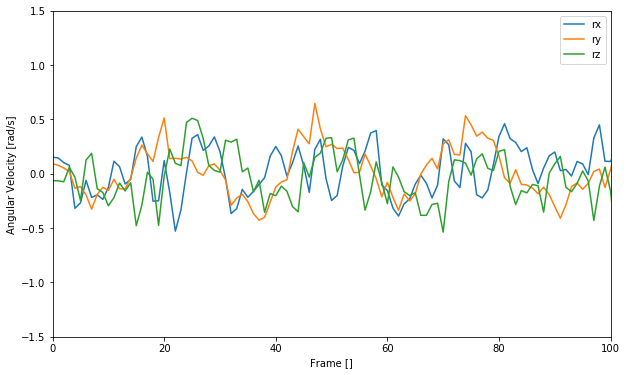

In [22]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

with open('../build/latest_estimated_angular_velocity.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダー行を読み飛ばし

    data = []
    for row in reader:
        data.append(row)

legends = [i for i in header]
data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
# data = [print(row) for row in data]  # 文字列を数値に変換
# X軸に時間を、Y軸にデータをセット
t = [row[legends.index('Frame')] for row in data]
rx = [row[legends.index('rx')] for row in data]
ry = [row[legends.index('ry')] for row in data]
rz = [row[legends.index('rz')] for row in data]

plt.figure(figsize=(10,6))

plt.plot(t, rx, label='rx')
plt.plot(t, ry, label='ry')
plt.plot(t, rz, label='rz')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Angular Velocity [rad/s]')
plt.ylim(-1.5,1.5)
plt.xlim(0,100)
plt.show()

In [23]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

def openCSV(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)  # ヘッダー行を読み飛ばし

        data = []
        for row in reader:
            data.append(row)

    legends = [i for i in header]
    data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
    # data = [print(row) for row in data]  # 文字列を数値に変換
    # X軸に時間を、Y軸にデータをセット
    t = [row[legends.index('Frame')] for row in data]
    rxw = [row[legends.index('rx')] for row in data]
    ryw = [row[legends.index('ry')] for row in data]
    rzw = [row[legends.index('rz')] for row in data]
    return t, rxw, ryw, rzw

def plotAngularVelocityCSV(t,rx,ry,rz,xlim=None,ylim=None):


    plt.figure(figsize=(10,6))

    plt.plot(t, rx, 'r',label='rx')
    plt.plot(t, ry, 'g', label='ry')
    plt.plot(t, rz, 'b' ,label='rz')
    # plt.plot(t, rxw, 'r--',label='rxw')
    # plt.plot(t, ryw, 'g--',label='ryw')
    # plt.plot(t, rzw, 'b--',label='rzw')
    plt.legend()

    #ラベルを追加
    plt.xlabel('Frame []')
    plt.ylabel('Angular Velocity [rad/s]')
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.show()

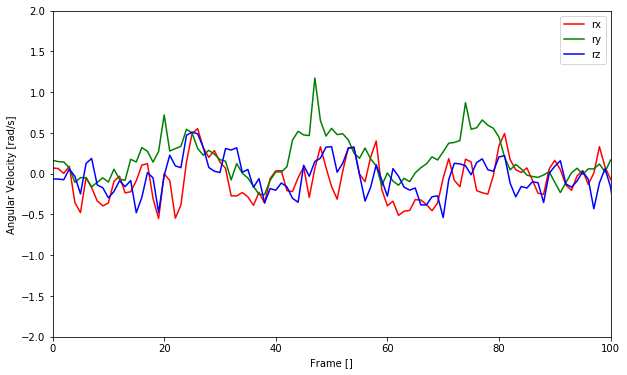

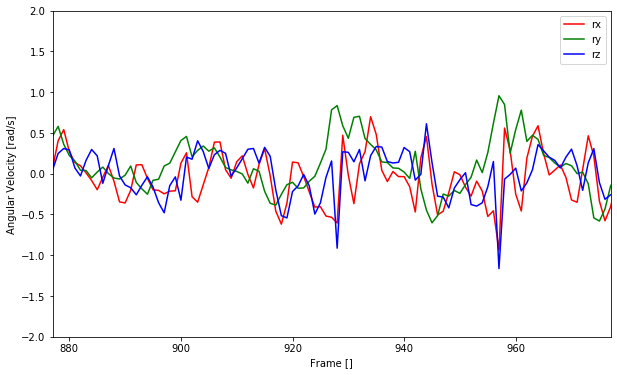

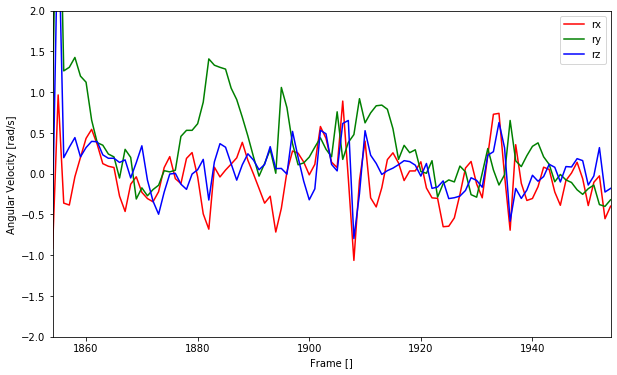

In [40]:
tc, rxc, ryc, rzc = openCSV('../build/latest_estimated_angular_velocity.csv')
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[0,100],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[max(t)/2-100,max(t)/2],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[max(t)-100,max(t)],ylim=[-2,2])

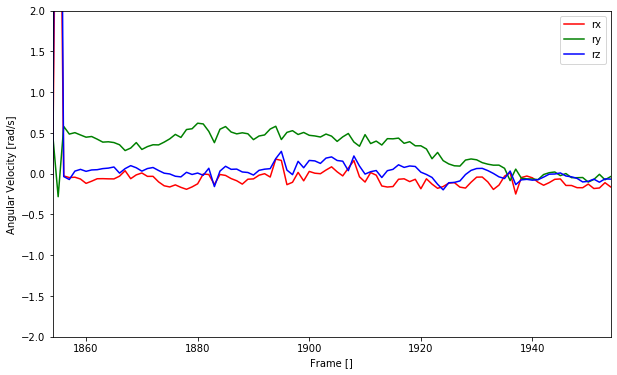

In [41]:
tc, rxwc, rywc, rzwc = openCSV('../build/latest_warped_estimated_angular_velocity.csv')
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-2,2])

In [42]:
def plotDualAngularVelocityCSV(t,rx,ry,rz,rxw,ryw,rzw,xlim=None,ylim=None):


    plt.figure(figsize=(10,6))

    plt.plot(t, rx, 'r',label='rx')
    plt.plot(t, ry, 'g', label='ry')
    plt.plot(t, rz, 'b' ,label='rz')
    plt.plot(t, rxw, 'r--',label='rxw')
    plt.plot(t, ryw, 'g--',label='ryw')
    plt.plot(t, rzw, 'b--',label='rzw')
    plt.legend()

    #ラベルを追加
    plt.xlabel('Frame []')
    plt.ylabel('Angular Velocity [rad/s]')
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.show()

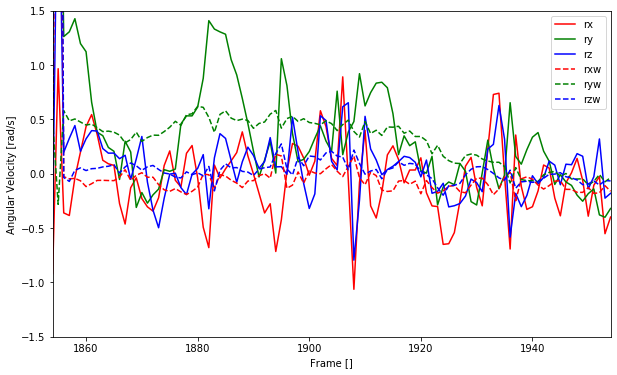

In [43]:
# 時刻同期が取れている最後
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-1.5,1.5])

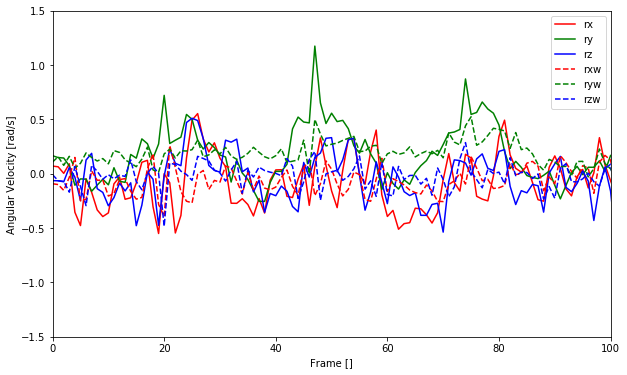

In [33]:
# 最初
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[0,100],ylim=[-1.5,1.5])

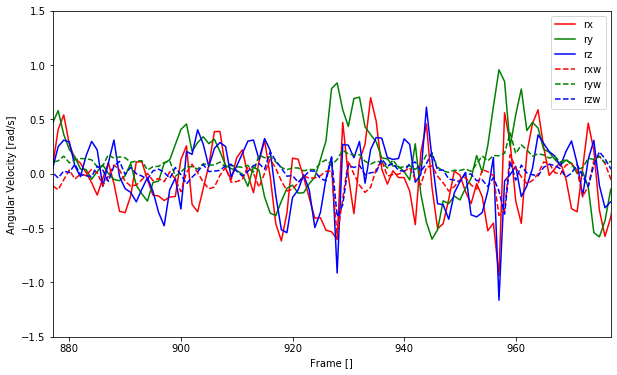

In [34]:
# 中程
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[max(t)/2-100,max(t)/2],ylim=[-1.5,1.5])

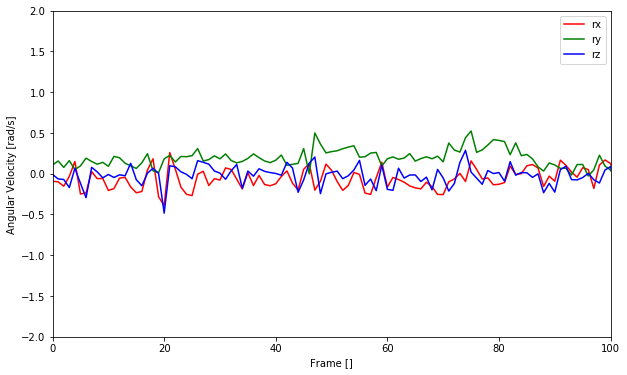

In [36]:
# 最初
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[0,100],ylim=[-2,2])

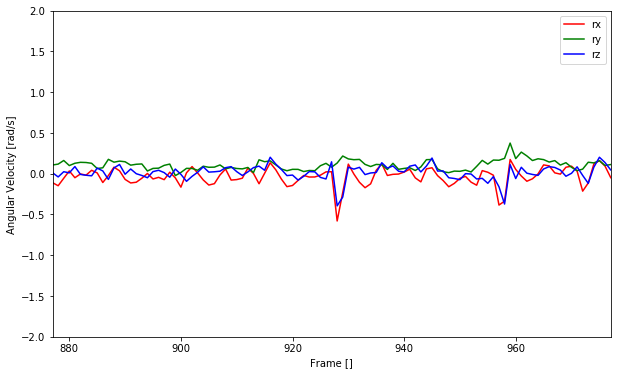

In [37]:
# 中程
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)/2-100,max(t)/2],ylim=[-2,2])

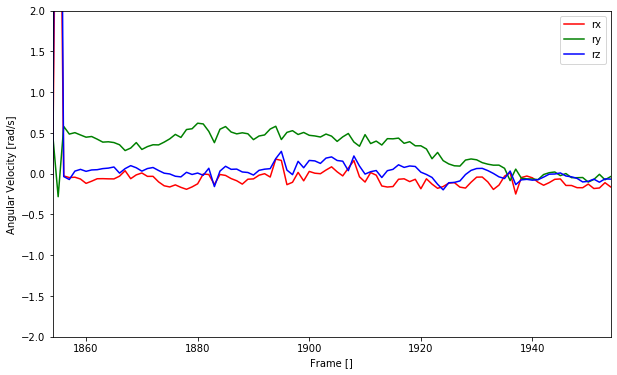

In [38]:
# 最後の再掲
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-2,2])